#### PRNG evolution analysis with prediction attacks

The cell below contains experimental configuration settings in the form of a python dictionary.

In [2]:
from Core.Experiment import Experiment

Using TensorFlow backend.



Generating 100 sets of 1000 using Middle_Square ...

Generation Successful!

Normalizing and shaping data for training...

Training and testing sets were successfully generated with input and target data...

x_train (100, 999, 1)
y_train (100,)
x_test (100, 999, 1)
y_test (100,)

Printing Model Summary...

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv1D)              (None, 998, 4)            12        
_________________________________________________________________
conv_2 (Conv1D)              (None, 997, 4)            36        
_________________________________________________________________
conv_3 (Conv1D)              (None, 996, 4)            36        
_________________________________________________________________
conv_4 (Conv1D)              (None, 995, 4)            36        
_________________________________________________________________
maxpool_1

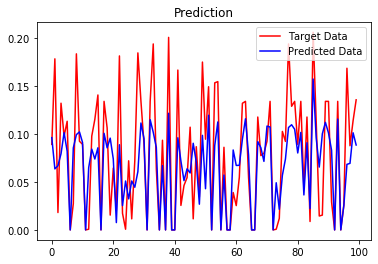

[0.08927839 0.17849112 0.0181351  0.1322007  0.09786285 0.11335437
 0.         0.02744731 0.18370746 0.09253319 0.08927839 0.
 0.00072174 0.09786285 0.11529446 0.14078516 0.         0.1341322
 0.10644732 0.01545804 0.06450621 0.02060271 0.18154053 0.01738353
 0.00072174 0.07210947 0.01151949 0.07210947 0.18468287 0.1341322
 0.08927839 0.         0.1341322  0.19403436 0.06352501 0.
 0.09355689 0.         0.20087639 0.         0.         0.16678814
 0.02557526 0.04635609 0.05462335 0.10717721 0.01155919 0.08682152
 0.03455246 0.175123   0.09464368 0.14936962 0.         0.15342771
 0.15473491 0.         0.08621052 0.         0.         0.03900243
 0.02537524 0.05494055 0.13214018 0.1341322  0.05494055 0.
 0.         0.1177728  0.07747476 0.08000095 0.09253319 0.1341322
 0.         0.00072174 0.01201825 0.10274613 0.0923145  0.19403436
 0.12898153 0.1341322  0.08927839 0.1341322  0.04313692 0.1177728
 0.00879907 0.20624167 0.11325522 0.01451504 0.01545804 0.1341322
 0.1341322  0.02918717 0

In [3]:
configuration = {
    'SEED_METHOD' : 'ticks',  #using SEED_METHODS.py as source
    'PRNG_METHOD' : 'Middle_Square', #using PRNG_METHODS.py as source
    'NUM_SETS' : 100,    #generate NUM_SETS sets of length SET_LEN
    'SET_LEN': 1000,
    'IS_NEW_MODEL' : True,
    'PATH' : 'foo', #if IS_NEW_MODEL, new files will be created / overidden at this location. If !IS_NEW_MODEL, previous model with weights will be loaded. File must be named
    'BATCH_SIZE': 15,
    'NUM_EPOCHS': 20
}
E = Experiment(configuration)
E.perform()


In [31]:
from datetime import *

def ticks():
    return  str( int( (datetime.utcnow() - datetime(1, 1, 1)).total_seconds() * 10000000 ))[-6:]

print(int(ticks()))

862656
